# Model fitting

In [26]:
#import warnings
#warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


## loading data



In [27]:
print(test_SEDs[1])
data=Data.from_file(test_SEDs[1])


/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.dat



***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2



/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/astropy/table/table.py:1145: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  newcol = col[slice_]


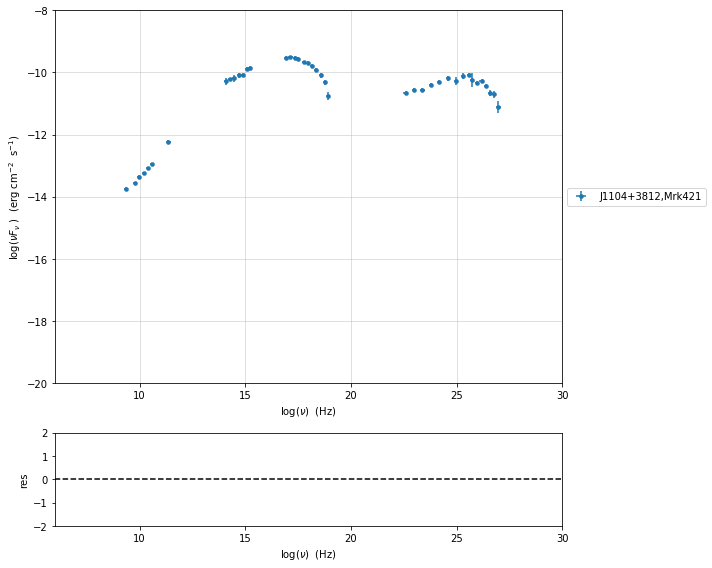

In [28]:
%matplotlib inline
from jetset.cosmo_tools import Cosmo
c=Cosmo()
sed_data=ObsData(data_table=data,cosmo=c)
sed_data.group_data(bin_width=0.2)

sed_data.add_systematics(0.1,[10.**6,10.**29])
p=sed_data.plot_sed()

## phenomenological model constraining

### spectral indices


*** evaluating spectral indices for data ***
---> initial range for index radio  set to [6.000000,10.000000]
---> range for index radio updated  to [6.000000,10.000000]
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.426527e+00, err=1.242337e-01 

---> initial range for index radio_mm  set to [10.000000,11.000000]
---> range for index radio_mm updated  to [10.000000,11.000000]
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.290348e+00, err=3.549105e-02 

---> initial range for index mm_IR  set to [11.000000,13.000000]
---> range for index mm_IR updated  to [10.300000,13.700000]
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.113008e+00, err=5.915490e-02 

---> initial range for index IR_Opt  set to [13.000000,14.000000]
---> range for index IR_Opt updated  to [12.500000,14.500000]
---> name = IR_Opt           range=[12.500,14.500] log(Hz)  photon.val=-1.783218e+00, err=9.834847e-02 

---> initial range for i

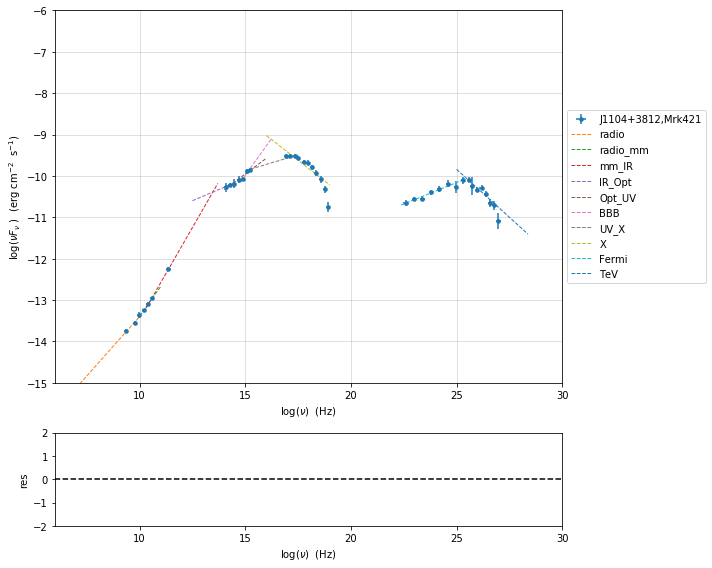

In [29]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

### sed shaper

In [30]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=False,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
name   par type       units      val  phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- ----- ---------------- ---------------- ----- ------
   b    curvature                -1.0            -10.0              0.0 False  False
   c third-degree                -1.0            -10.0             10.0 False  False
  Ep    peak freq            Hz  14.0              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s) -10.0            -30.0              0.0  True  False
---> class:  HSP

name   par type       units              val          phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- --------------------- ---------------- ---------------- ----- ------
   b    curvature                -0.15453004839441498            -10.0              0.0 False  False
   c third-degree               -0.010232447712917647        

In [31]:
best_fit.show_report()


**************************************************************************************************
Fit report

Model: sync-shape-fit
name   par type       units              val          phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- --------------------- ---------------- ---------------- ----- ------
   b    curvature                -0.15453004839441498            -10.0              0.0 False  False
   c third-degree               -0.010232447712917647            -10.0             10.0 False  False
  Ep    peak freq            Hz    16.722672085915843              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s)    -9.491658506170065            -30.0              0.0  True  False

converged=True
calls=28
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
dof=18
chisq=28.486970, chisq/red=1.582609 null hypothesis sig=0.055021

best fit pars
name      bestfit val              err +         err -   


*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-fit
name   par type       units             val          phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- -------------------- ---------------- ---------------- ----- ------
   b    curvature               -0.20979248257934202            -10.0              0.0 False  False
   c third-degree               -0.04662648109652068            -10.0             10.0 False  False
  Ep    peak freq            Hz   25.249320432055992              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s)  -10.110940957544976            -30.0              0.0  True  False

converged=True
calls=202
------------------------------------------------------------------
| FCN = 5.911                   |     Ncalls=201 (201 total)     |
| EDM = 5.56E

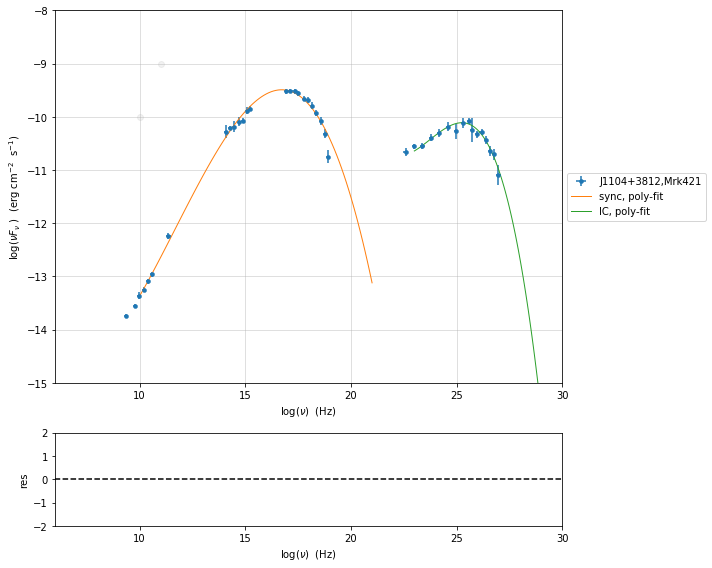

In [34]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

### model constraining


***  constrains parameters from observable ***
      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       1000000000

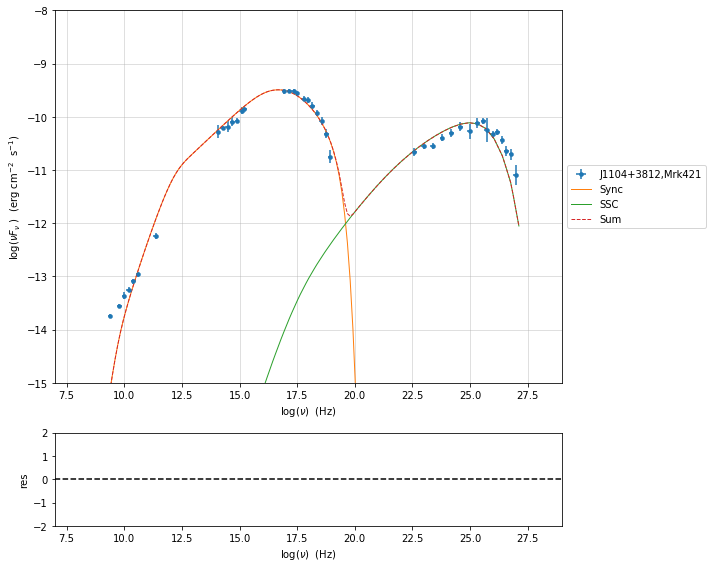

In [8]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E12,
                        SEDShape=my_shape)


jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False)
pl=jet.plot_model(sed_data=sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

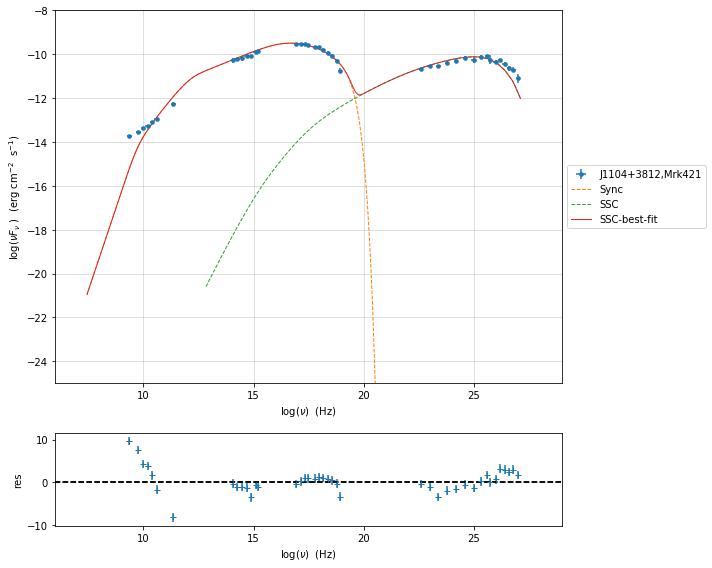

In [10]:
from jetset.model_manager import  FitModel
from jetset.plot_sedfit import PlotSED
jet.set_gamma_grid_size(200)
fit_model=FitModel( jet=jet, name='SSC-best-fit',template=my_shape.host_gal)
fit_model.set_nu_grid(1E6,1E30,200)
fit_model.eval()
pl=fit_model.plot_model(sed_data=sed_data)
pl.rescale(y_min=-25,x_min=6,x_max=29)


## Model fitting

We remind that we can use different ``minimizers`` for the model fitting. In the following we will use the ``minuit`` minimizer, but as alternative we can use the ``lsb`` minimizer. Using ``minuit`` we notice that sometime (as in the case below) the fit will converge, but the quality  will not be enough (``valid==false``) to run ``minos``. Anyhow, as shown in the :ref:`MCMC sampling`, it still possible to estimate asymmetric errors by means of MCMC sampling

In [11]:
from jetset.model_manager import  FitModel

jet.set_gamma_grid_size(200)

fit_model=FitModel( jet=jet, name='SSC-best-fit',template=None)#my_shape.host_gal)
fit_model.freeze('z_cosm')
fit_model.parameters.gmax.fit_range=[1E5,1E9]
fit_model.freeze('R_H')
#fit_model.parameters.nuFnu_p_host.frozen=True
#fit_model.parameters.nu_scale.frozen=True
fit_model.show_pars()

#lsb minimizer
print('%e'%fit_model.nu_min_fit)
model_minimizer,best_fit=fit_SED(fit_model,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit',minimizer='lsb')
print('%e'%fit_model.nu_min_fit)
#minuti minimizer
model_minimizer,best_fit=fit_SED(fit_model,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit',minimizer='minuit',loglog=True)

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3 3.0721637771157786              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor* 333.82306366971983              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*  975813.3512932507              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                 2.1815775138311513            -10.0               10.0 False  False
               r  spectral_curvature                 0.7726502419720749            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*  22658.54895147617              1.0       1000000000.0 False  False
               R         region_

In [24]:
print('%e'%fit_model.nu_min_fit)

1.000000e+11


In [25]:
fit_model.set_nu_grid(1E8,1E30,200)

print('%e'%fit_model.nu_min_fit)

1.000000e+11


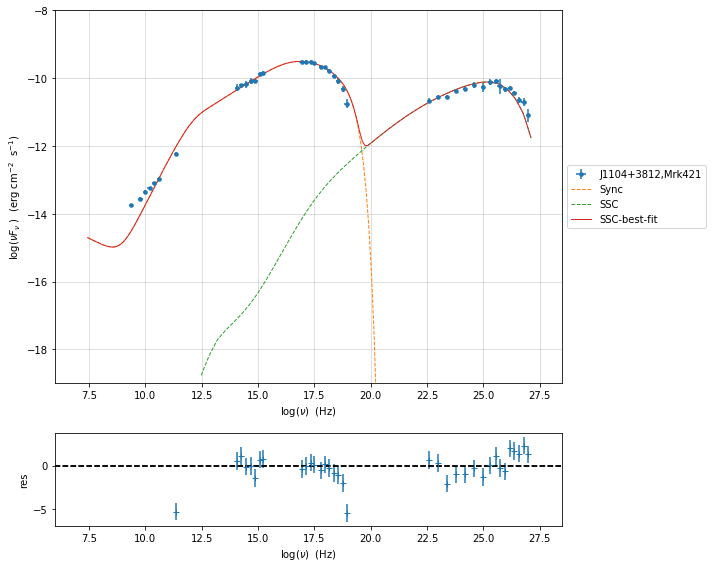

In [12]:
%matplotlib inline
fit_model.set_nu_grid(1E6,1E30,200)
fit_model.eval()
p2=fit_model.plot_model(sed_data=sed_data)
p2.rescale(y_min=-19,x_min=6,x_max=28.5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

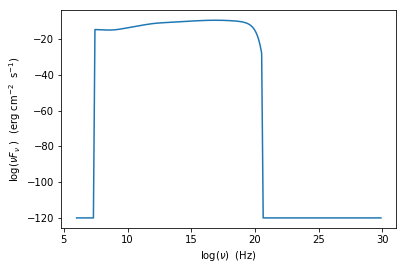

In [14]:
%matplotlib widget
jet.eval()
jet.spectral_components.Sync.plot()

In [18]:
jet.electron_distribution.n_gamma

array([0.00000000e+00, 9.00605905e-03, 8.27802501e-03, 7.58278777e-03,
       6.96980848e-03, 6.38444297e-03, 5.86833578e-03, 5.37547842e-03,
       4.94093416e-03, 4.52596544e-03, 4.16009432e-03, 3.81070513e-03,
       3.50265440e-03, 3.20848088e-03, 2.94911290e-03, 2.70142905e-03,
       2.48305026e-03, 2.27450909e-03, 2.09064176e-03, 1.91505736e-03,
       1.76024748e-03, 1.61241154e-03, 1.48206702e-03, 1.35759431e-03,
       1.24784876e-03, 1.14304708e-03, 1.05064516e-03, 9.62405799e-04,
       8.84606599e-04, 8.10312133e-04, 7.44807919e-04, 6.82254569e-04,
       6.27102304e-04, 5.74434564e-04, 5.27998279e-04, 4.83653878e-04,
       4.44556145e-04, 4.07219705e-04, 3.74300777e-04, 3.42864796e-04,
       3.15148206e-04, 2.88680206e-04, 2.65343804e-04, 2.43058670e-04,
       2.23410233e-04, 2.04646927e-04, 1.88103628e-04, 1.72305579e-04,
       1.58376698e-04, 1.45075291e-04, 1.33347658e-04, 1.22148338e-04,
       1.12274080e-04, 1.02844642e-04, 9.45308614e-05, 8.65916036e-05,
      

In [19]:
jet.save_model('test_anomalous_synch')

## iminuit parameters contour

In [32]:
p=model_minimizer.minimizer.minuit_fun.minos()

warning nan for par 1  old paramter value was 1152.3310584498595                                                                                                                                                                                                
    name           par type           units              val         phys. bound. min  phys. bound. max   log  frozen
------------ ------------------- --------------- ------------------- ---------------- ------------------ ----- ------
           N    electron_density         1 / cm3 0.06882497859816672              0.0               None False  False
        gmin  low-energy-cut-off lorentz-factor*                 nan              1.0       1000000000.0 False  False
        gmax high-energy-cut-off lorentz-factor*  2284601.2070229677              1.0 1000000000000000.0 False  False
           p   LE_spectral_slope                   2.237978695070213            -10.0               10.0 False  False
   gamma_cut    turn-over-energy lo

In [33]:
best_fit.show_report()


**************************************************************************************************
Fit report

Model: SSC-best-fit
    name           par type           units              val         phys. bound. min  phys. bound. max   log  frozen
------------ ------------------- --------------- ------------------- ---------------- ------------------ ----- ------
           N    electron_density         1 / cm3 0.06862833443086602              0.0               None False  False
        gmin  low-energy-cut-off lorentz-factor*   707042095.8515811              1.0       1000000000.0 False  False
        gmax high-energy-cut-off lorentz-factor*   1243478.956207814              1.0 1000000000000000.0 False  False
           p   LE_spectral_slope                   2.233183783587357            -10.0               10.0 False  False
   gamma_cut    turn-over-energy lorentz-factor*  506851.24625731754              1.0       1000000000.0 False  False
           R         region_size          

In [68]:
a=model_minimizer.minimizer.minuit_fun.migrad()

\ minim function calls=180, chisq=1598.641339 UL part=-0.000000                                                                                                                                                                                                 

In [69]:
a

------------------------------------------------------------------
| FCN = 20.61                   |     Ncalls=74 (287 total)      |
| EDM = 18.6 (Goal: 1E-05)      |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     True      |     True      |   False   |   False   | False  |
------------------------------------------------------------------
-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | par_0 |   0.26    |   0.00    |            |            |    0    |         |       |
| 1 | par_1 |   1678    |     0     |            |            |    1    |  1e+09  |       |
| 2 | par_2 |  0.531E7  |  0.000E7  |            |            | 100000  |  1e+08  |       |
| 3 | par_3 |    2.7    |    0.0    |            |            |   -10   |   10    |       |
| 4 | par_4 |  2.883E6  |  0.000E6  |            |            |    1    |  1e+09  |       |
| 5 | par_5 |  1.0E17   |  0.0E17   |            |            |    0    |         |       |
| 6 | par_6 |   0.005   |   0.000   |            |            |    0    |         |       |
| 7 | par_7 |    28     |     0     |            |            | 0.0001  |         |       |
-------------------------------------------------------------------------------------------

## MCMC sampling

In [1]:
from jetset.mcmc import McmcSampler


In [14]:
jet.set_gamma_grid_size(100)
mcmc=McmcSampler(model_minimizer)
mcmc.run_sampler(nwalkers=150,burnin=10,threads=1,steps=50)

/ progress=102.000% calls=7650 accepted=6275

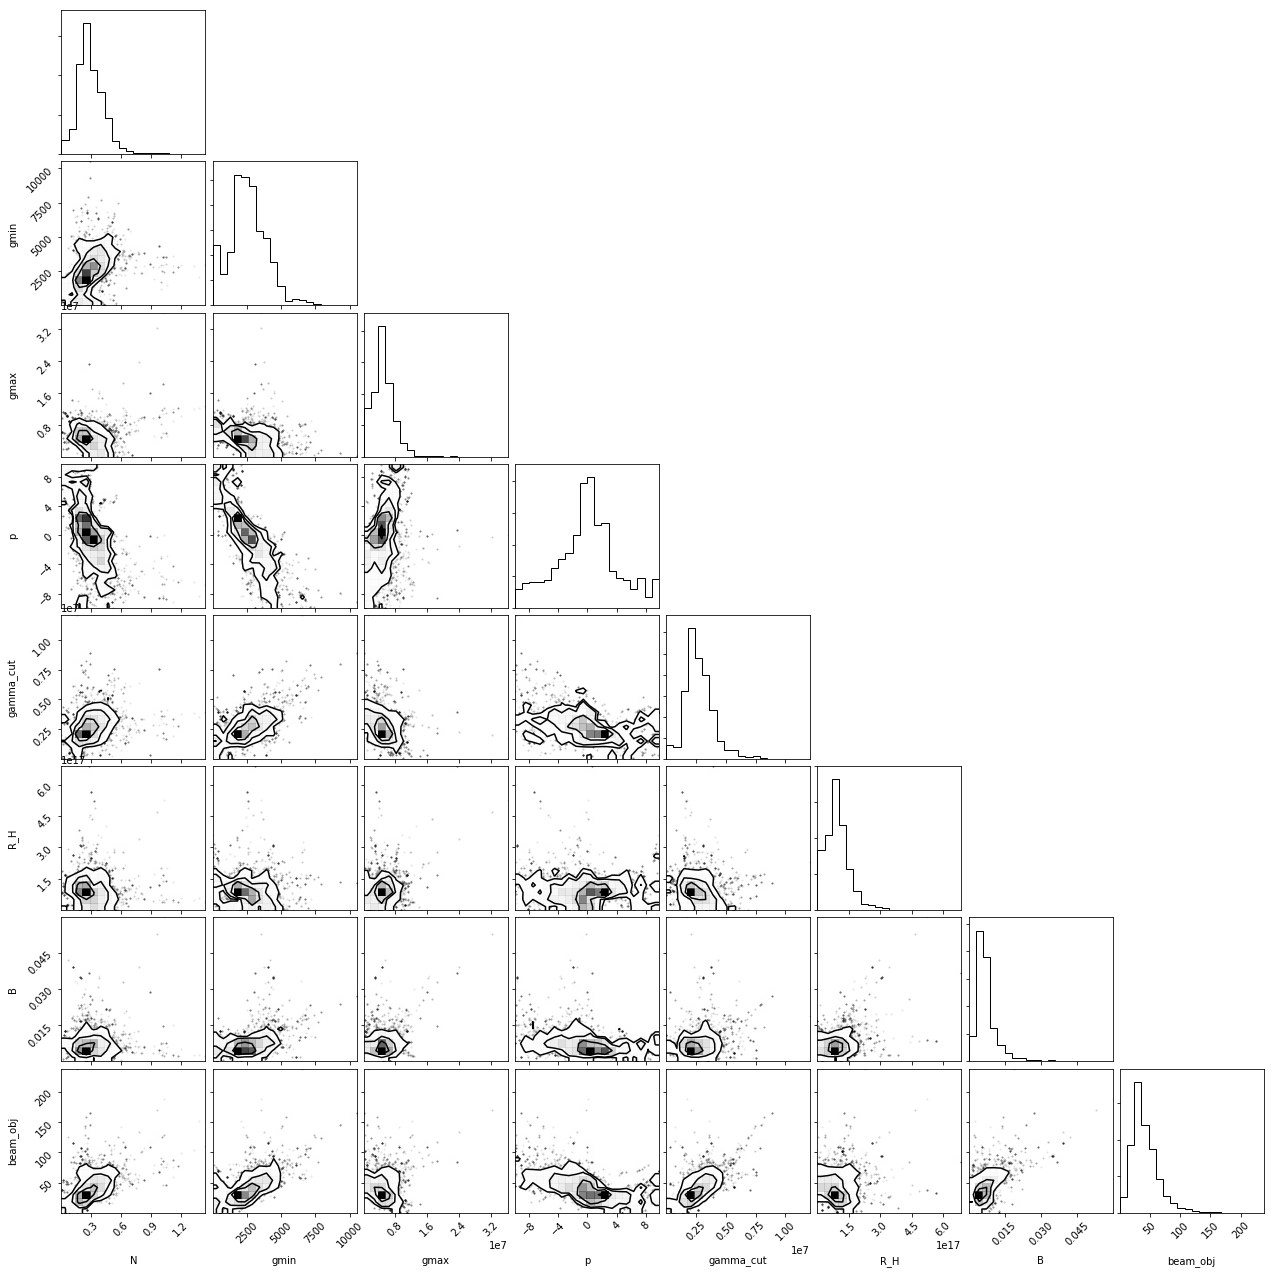

In [16]:
f=mcmc.corner_plot()

In [32]:
mcmc.sampler_out.get_par('N')

array([0.23351217, 0.23124466, 0.25228734, ..., 0.43208035, 0.47039531,
       0.49643137])

In [25]:
f

array([0.23351217, 0.23124466, 0.25228734, ..., 0.43208035, 0.47039531,
       0.49643137])

In [6]:
f=mcmc.sampler_out.plot_par('beam_obj')

NameError: name 'mcmc' is not defined

In [19]:
mcmc.seve_run('test_run')

In [2]:
from jetset.mcmc import SamplerOutput
s=SamplerOutput.from_file('test_run')

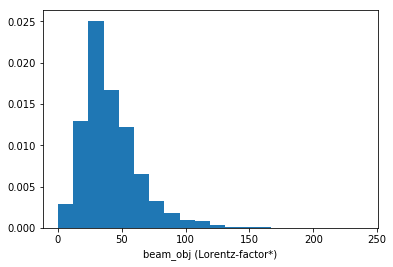

In [3]:
f=s.plot_par('beam_obj',log_plot=False)


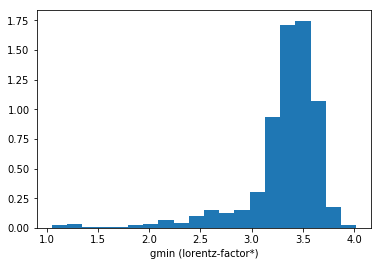

In [4]:
f=s.plot_par('gmin',log_plot=True)


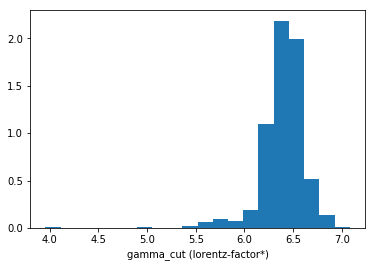

In [5]:
f=s.plot_par('gamma_cut',log_plot=True)
